<a href="https://colab.research.google.com/github/panicoro/FS-course-data-ai/blob/master/1_8_Funciones_de_p%C3%A9rdida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Datos e Inteligencia Artificial para la industria del software**

## **Edición 2023**

---
## 1.8. Funciones de Pérdida, Regularización y Optimización, Funciones Convexas y no Convexas


Las funciones de pérdida, también conocidas como funciones de costo o funciones de error, son fundamentales en el aprendizaje supervisado. Estas funciones miden qué tan bien el modelo predice la salida esperada. Durante el entrenamiento, el objetivo es minimizar esta función de pérdida.

La función de coste ( $l$ ), también llamada función de pérdida, loss function o cost function, es la encargada de cuantificar la distancia entre el valor real y el valor predicho por la red, en otras palabras, mide cuánto se equivoca la red al realizar predicciones. En la mayoría de casos, la función de coste devuelve valores positivos. Cuanto más próximo a cero es el valor de coste, mejor son las predicciones de la red (menor error), siendo cero cuando las predicciones se corresponden exactamente con el valor real.

La función de coste puede calcularse para una única observación o para un conjunto de datos (normalmente promediando el valor de todas las observaciones). El segundo caso, es el que se utiliza para dirigir el entrenamiento de los modelos.

Dependiendo del tipo de problema, regresión o clasificación, es necesario utilizar una función de coste u otra. En problemas de regresión, las más utilizadas son el error cuadrático medio y el error absoluto medio. En problemas de clasificación suele emplearse la función log loss, también llamada logistic loss o cross-entropy loss.

**Error cuadrático medio**

El error cuadrático medio (mean squared error, MSE) es con diferencia la función de coste más utilizada en problemas de regresión. Para una determinada observación  $i$, el error cuadrático se calcula como la diferencia al cuadrado entre el valor predicho $\hat{y}$ y el valor real  $y$

$$
l^{(i)}(\mathbf{w}, b) = \left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$

Las funciones de coste suelen escribirse con la notación  $l(w,b)$  para hacer referencia a que su valor depende de los pesos y bias del modelo, ya que son estos los que determinan el valor de las predicciones  $y^{(i)}$.

Con frecuencia, esta función de coste se encuentra multiplicada por $\frac{1}{2}$, esto es simplemente por conveniencia matemática para simplificar el cálculo de su derivada.

$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$

Para cuantificar el error que comete el modelo todo un conjunto de datos, por ejemplo los de entrenamiento, simplemente se promedia el error de todas las  $N$
  observaciones.

  $$
  L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \left(\hat{y}^{(i)} - y^{(i)}\right)^2
  $$

Cuando un modelo se entrena utilizando el error cuadrático medio como función
de coste, está aprendiendo a predecir la media de la variable respuesta.


**Error medio absoluto**

El error medio absoluto (mean absolute error, MAE) consiste en promediar el error absoluto de las predicciones.

$$
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n |\hat{y}^{(i)} - y^{(i)}|
$$


El error medio absoluto es más robusto frente a outliers que el error cuadrático medio. Esto significa que el entrenamiento del modelo se ve menos influenciado por datos anómalos que pueda haber en el conjunto de entrenamiento. Cuando un modelo se entrena utilizando el error absoluto medio como función de coste, está aprendiendo a predecir la mediana de la variable respuesta.


**Log loss, logistic loss o cross-entropy loss**

En problemas de clasificación, la capa de salida utiliza como función de activación la función *softmax*. Gracias a esta función, la red devuelve una serie de valores que pueden interpretarse como la probabilidad de que la observación predicha pertenezca a cada una de las posibles clases.

Cuando la clasificación es de tipo binaria, donde la variable respuesta es 1 o 0, y  $p=Pr(y=1)$, la función de coste log-likelihood se define como:

$$
L_{\log}(y, p) = -\log \operatorname{Pr}(y|p) = -(y \log (p) + (1 - y) \log (1 - p))
$$

Para problemas de clasificación con más de dos clases, esta fórmula se generaliza a:

$$
L_{\log}(Y, P) = -\log \operatorname{Pr}(Y|P) = - \frac{1}{N} \sum_{i=0}^{N-1} \sum_{k=0}^{K-1} y_{i,k} \log p_{i,k}
$$

En ambos casos, minimizar esta la función equivale a que la probabilidad predicha para la clase correcta tienda a 1, y a 0 en las demás clases.

Dado que esta función se ha utilizado en campos diversos, se le conoce por nombres distintos: Log loss, logistic loss o cross-entropy loss, pero todos hacen referencia a lo mismo.


[Para más información](https://scikit-learn.org/stable/modules/model_evaluation.html#log-loss)

# Hiperparámetros


La gran "flexibilidad" que tienen las redes neuronales es un arma de doble filo. Por un lado, son capaces de generar modelos que aprenden relaciones muy complejas, sin embargo, sufren fácilmente el problema de sobreajuste (overfitting) lo que los incapacita al tratar de prdecir nuevas observaciones. La forma de minimizar este problema y conseguir modelos útiles, pasa por configurar de forma adecuada sus hiperparámetros. Algunos de los más importantes son:

**Número y tamaño de capas**


La arquitectura de una red, el número de capas y el número de neuronas que forman parte de cada capa, determinan en gran medida la complejidad del modelo y con ello su potencial capacidad de aprendizaje.

La capa de entrada y salida son sencillas de establecer. La capa de entrada tiene tantas neuronas como predictores y la capa de salida tiene una neurona en problemas de regresión y tantas como clases en problemas de clasificación. En la mayoría de implementaciones, estos valores se establecen automáticamente en función del conjunto de entrenamiento. El usuario suele especificar únicamente el número de capas intermedias (ocultas) y el tamaño de las mismas.

Cuantas más neuronas y capas, mayor la complejidad de las relaciones que puede aprender el modelo. Sin embargo, dado que en cada neurona está conectada por pesos al resto de neuronas de las capas adyacentes, el número de parámetros a aprender aumenta y con ello el tiempo de entrenamiento.


**Learning rate**


El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza (aprende). Este hiperparámetro es uno de los más complicados de establecer, ya que depende mucho de los datos e interacciona con el resto de hiperparámetros. Si el learning rate es muy grande, el proceso de optimización puede ir saltando de una región a otra sin que el modelo sea capaz de aprender. Si por el contrario, el learning rate es muy pequeño, el proceso de entrenamiento puede tardar demasiado y no llegar a completarse.Algunas de las recomendaciones heurísticas basadas en prueba y error son:

Utilizar un learning rate lo más pequeño posible siempre y cuando el tiempo de entrenamiento no supere las limitaciones temporales disponibles.

No utilizar un valor constante de learning rate durante todo el proceso de entrenamiento. Por lo general, utilizar valores mayores al inicio y pequeños al final.


**Algoritmo de optimización**


El descenso de gradiente y el descenso de gradiente estocástico fueron de los primeros métodos de optimización utilizados para entrenar modelos de redes neuronales. Ambos utilizan directamente el gradiente para dirigir la optimización. Pronto se vio que esto genera problemas a medida que las redes aumentan de tamaño (neuronas y capas). En muchas regiones del espacio de búsqueda, el gradiente es muy proximo a cero, lo que hace que la optimización quede estancada en estas regiones. Para evitar este problema, se han desarrollado modificaciones del descenso de gradiente capaces de adaptar el learning rate en función del gradiente y subgradiente. De esta forma, el proceso de aprendizaje se ralentiza o acelera dependiendo de las características de la región del espacio de búsqueda en el que se encuentren. Aunque existen multitud de adaptaciones, suele recomendarse:

* Para conjuntos de datos pequeños: l-bfgs

* Para conjuntos de datos grandes: adam o rmsprop

La elección del algoritmo de optimización puede tener un impacto muy grande en el aprendizaje de los modelos, sobretodo en deep learning.


**Regularización**


Los métodos de regularización se utilizan con el objetivo de reducir el sobreajuste (overfitting) de los modelos. Un modelo con sobreajuste memoriza los datos de entrenamiento pero es incapaz de predecir correctamente nuevas observaciones.

Los modelos de redes neuronales pueden considerarse como modelos sobre parametrizados, por lo tanto, las estrategias de regularización son fundamentales. De entre las muchas que existen, destacan la regularización L1 y L2 (weight decay), y el dropout.

* **Penalización L1 y L2**

El objetivo de la penalización L1 y L2, esta última también conocida como weight decay, es evitar que los pesos tomen valores excesivamente elevados. De esta forma se evita que unas pocas neuronas dominen el comportamiento de la red y se fuerza a que las características poco informativas (ruido) tengan pesos próximos o iguales a cero.


* **Dropout**

El proceso consiste en de desactivar aleatoriamente una serie de neuronas durante el proceso de entrenamiento. En concreto, durante cada iteración del entrenamiento, se ponen a cero los pesos de una fracción aleatoria de neuronas por capa. El método de dropout, descrito por Srivastava et al. en 2014, se ha convertido en un estándar para entrenar redes neuronales. El porcentaje de neuronas que suele desactivarse por capa (dropout rate) suele ser un valor entre 0.2 y 0.5.



## Técnicas de Regularización:

La regularización es una técnica que se utiliza para evitar el sobreajuste (overfitting) en modelos de aprendizaje automático, añadiendo una penalización a la complejidad del modelo.

### L1 Regularization (Lasso)

* Añade una penalización proporcional al valor absoluto de los coeficientes.
* Puede llevar algunos coeficientes a cero, realizando así una selección de características.

$$
J(\theta)=MSE(\theta)+\alpha \sum_{i=1}^{n}{|\theta_i|}
$$

### L2 Regularization (Ridge)

* Añade una penalización proporcional al cuadrado de los coeficientes.
* Reduce el valor de los coeficientes pero raramente los hace cero.

$$
J(\theta)=MSE(\theta)+\alpha \sum_{i=1}^{n}{\theta_i^2}
$$

### Elastic Net

* Combina L1 y L2.
* Controlado por un parámetro de mezcla $r$. Si $r=1$, Elastic Net es igual a Lasso; si $r=0$, es igual a Ridge.

$$
J(\theta)=MSE(\theta)+r\alpha \sum_{i=1}^{n}{|\theta_i|} + \frac{1-r}{2}\alpha \sum_{i=1}^{n}{\theta_i^2}
$$

### Dropout (para redes neuronales)

* Durante el entrenamiento, se "apagan" aleatoriamente algunas neuronas (es decir, se establecen a cero). Esto ayuda a prevenir dependencias no deseadas y coadaptaciones entre neuronas.
* En cada paso de entrenamiento, cada neurona tiene una probabilidad $p$ de ser "apagada".


# Técnicas de Optimización:

Estas técnicas buscan mejorar y acelerar el proceso de entrenamiento en modelos de aprendizaje automático.

## Descenso de Gradiente Estocástico (SGD)

* Actualiza los pesos utilizando solo un ejemplo de entrenamiento a la vez.
* Suele ser más rápido pero más oscilante que el descenso de gradiente estándar.

## Momentum

* Ayuda a acelerar el SGD en la dirección relevante y amortigua las oscilaciones.
* Añade un término de "momentum" al vector de gradiente para acelerar el descenso.

## RMSprop (Root Mean Square Propagation)

* Modifica el método de SGD para que tenga tasas de aprendizaje adaptativas para cada parámetro.
* Divide el gradiente por una medida del tamaño reciente de sus gradientes.

## Adam (Adaptive Moment Estimation)

* Combina ideas de Momentum y RMSprop.
* Calcula tasas de aprendizaje adaptativas para cada parámetro a partir de estimaciones del primer y segundo momento de los gradientes.

## Learning Rate Decay

* Reduce gradualmente la tasa de aprendizaje durante el entrenamiento.
* Puede ser una disminución constante, un decaimiento por pasos, una disminución exponencial, entre otros.

## Batch Normalization

* Aplica una transformación que mantiene la salida media cercana a 0 y la desviación estándar cercana a 1.
* Ayuda a abordar el problema del cambio interno de covariables en las redes neuronales profundas, lo que facilita el entrenamiento.

---

Para aplicar regularización y técnicas de optimización en el MLPClassifier de sklearn, puedes ajustar diversos parámetros al instanciar el modelo. Veamos cómo:

## Regularización:

En MLPClassifier, puedes regularizar tu modelo usando los parámetros alpha y penalty.

* `alpha`: Es el parámetro de regularización L2 (Ridge). Es decir, es el término que multiplica la penalización L2 que se añade a la función de pérdida. Valores más altos de `alpha` aumentan la regularización y pueden ayudar a prevenir el sobreajuste.


In [ ]:
# Ejemplo de uso de regularización L2:
mlp = MLPClassifier(alpha=0.01)


Para la regularización L1, lamentablemente, MLPClassifier en sklearn no la soporta directamente. Si necesitas L1 o Elastic Net, tendrías que recurrir a otras bibliotecas o implementarlo manualmente.

## Optimización:

El optimizador predeterminado para MLPClassifier en sklearn es 'adam', que es una técnica de optimización que utiliza estimaciones adaptativas del primer y segundo momento.

* `solver`: Es el parámetro para definir el optimizador. Puede ser 'adam', 'sgd' o 'lbfgs'. Para redes neuronales profundas, generalmente 'adam' funciona mejor, pero 'sgd' puede ser útil si necesitas más control sobre el aprendizaje.

* `learning_rate`: Es la tasa de aprendizaje para la actualización de pesos. Si eliges 'constant', el learning rate se mantiene igual durante todo el entrenamiento. Si eliges 'invscaling' o 'adaptive', el learning rate disminuirá durante el entrenamiento.

* `momentum`: Es el parámetro de momentum cuando eliges solver='sgd'. Momentum ayuda a acelerar el entrenamiento al considerar la actualización anterior del peso.

* `beta_1` y `beta_2`: Son los parámetros específicos para el optimizador 'adam' que controlan las estimaciones adaptativas del primer y segundo momento.

# **Ejemplo de Clasificación**

Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya separación no es perfecta.

In [ ]:
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

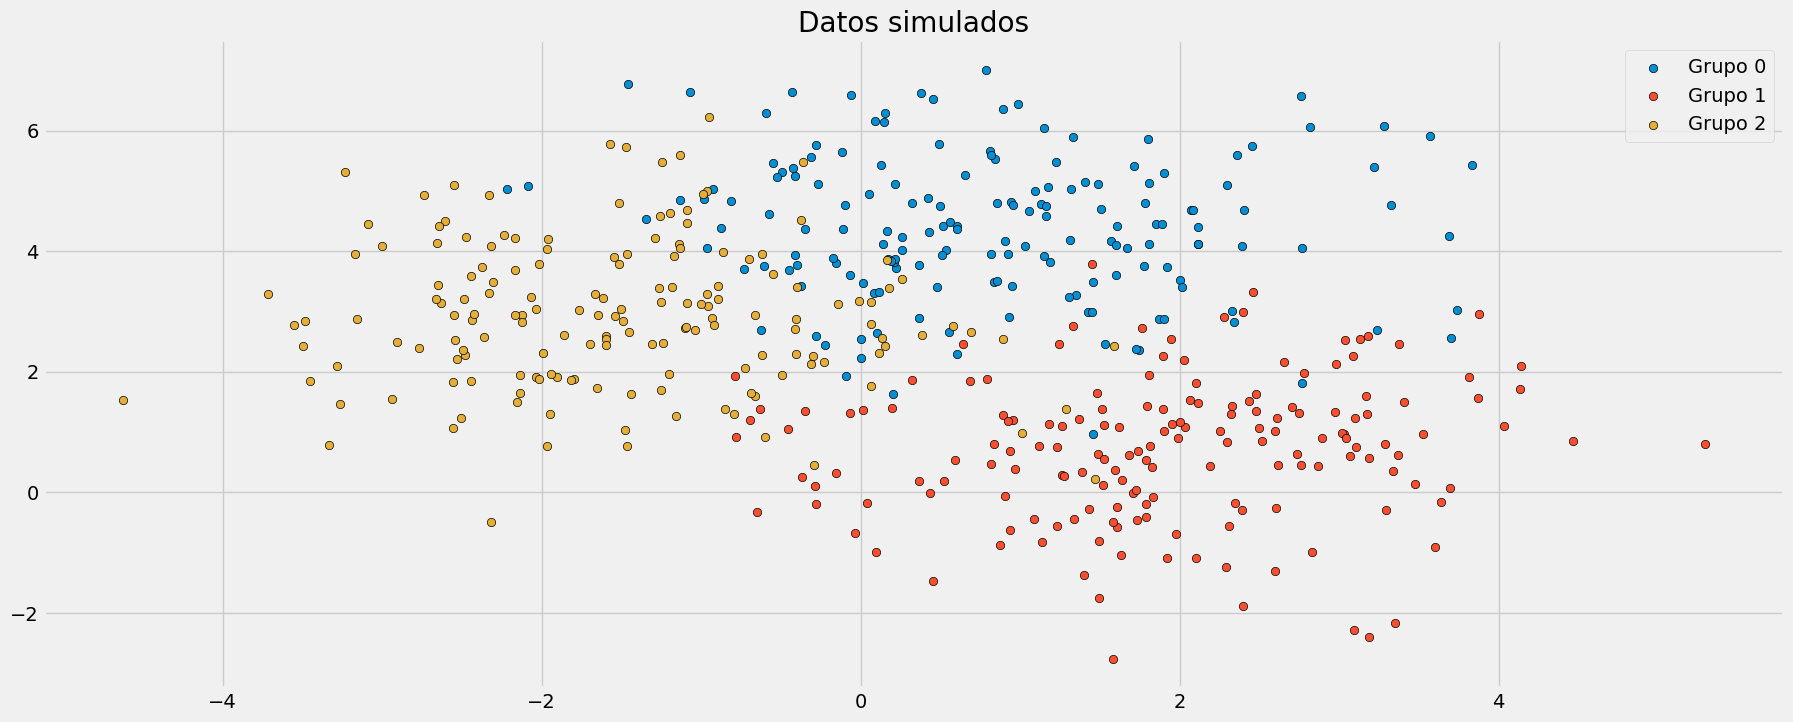

In [ ]:
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();

## Arquitectura de la red
Se procede a crear 4 modelos en orden creciente de complejidad (número de neuronas y capas), para comprobar cómo la arquitectura de la red afecta a su capacidad de aprendizaje.

In [ ]:
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=1000, random_state=123, solver='lbfgs')

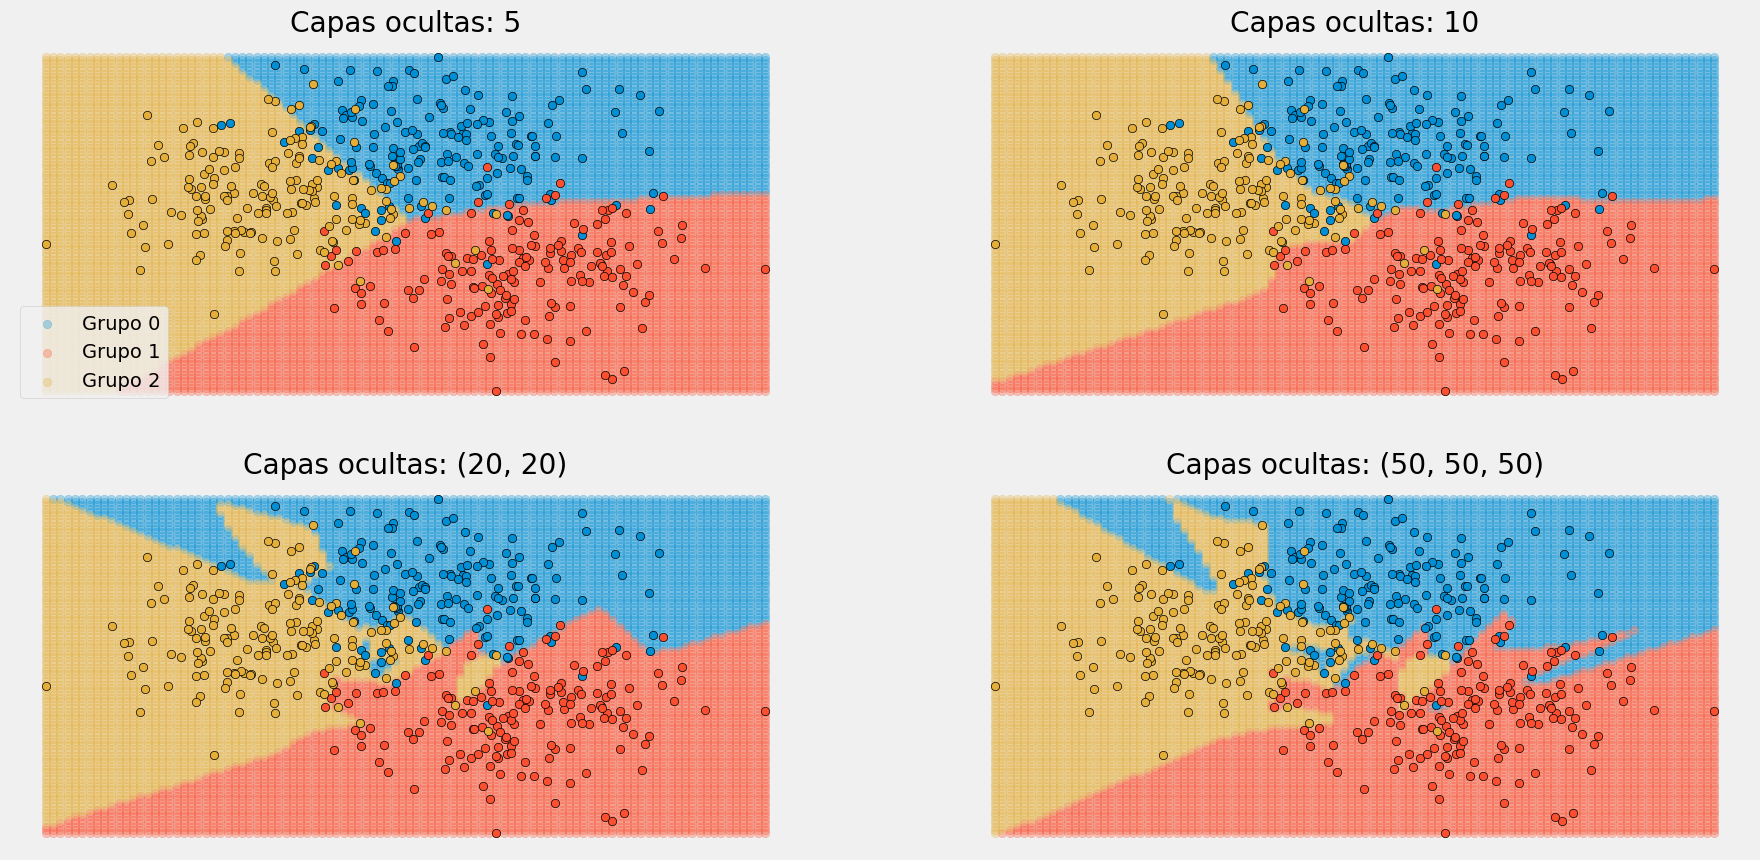

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )

    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

Puede observarse como, a medida que aumenta la complejidad de la red (más neuronas y más capas), las fronteras de decisión se adaptan más y más a los datos de entrenamiento.

---

## Optimización de hiperparámetros



Muchos modelos, entre ellos la regresión lineal con regularización Ridge, contienen parámetros que no pueden aprenderse a partir de los datos de entrenamiento y, por lo tanto, deben de ser establecidos por el analista. A estos se les conoce como hiperparámetros. Los resultados de un modelo pueden depender en gran medida del valor que tomen sus hiperparámetros, sin embargo, no se puede conocer de antemano cuál es el adecuado. Aunque con la práctica, los especialistas en machine learning ganan intuición sobre qué valores pueden funcionar mejor en cada problema, no hay reglas fijas. La forma más común de encontrar los valores óptimos es probando diferentes posibilidades.

1. Escoger un conjunto de valores para el o los hiperparámetros.

  * *grid search*: se hace una búsqueda exhaustiva sobre un conjunto de valores previamente definidos por el usuario.

  * *random search*: se evalúan valores aleatorios dentro de unos límites definidos por el usuario.

2. Para cada valor (combinación de valores si hay más de un hiperparámetro), entrenar el modelo y estimar su error mediante un método de validación.

3. Finalmente, ajustar de nuevo el modelo, esta vez con todos los datos de entrenamiento y con los mejores hiperparámetros encontrados.

**Scikilearn** permite explorar diferentes valores de hiperparámetros mediante `model_selection.GridSearchCV()` y `model_selection.RandomizedSearchCV()`



## **Grid search**
El modelo Ridge empleado hasta ahora tiene un hiperparámetro llamado alpha, que por defecto tiene el valor 1.0. Este hiperparámetro controla la penalización que se aplica a los coeficientes del modelo. Cuanto mayor es su valor, más restricción se impone sobre los coeficientes, reduciendo así varianza, atenuando el efecto de la correlación entre predictores y minimizando el riesgo de overfitting.

Se vuelve a ajustar un modelo Ridge con diferentes valores de alpha empleando validación cruzada repetida para identificar con cuál se obtienen mejores resultados.

### Busquemos el alpha

In [ ]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'alpha':[0.5,0.4,0.2,0.1,0.001,0.0001]}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([2.24494648, 2.61634002, 3.65011978, 2.63220267, 1.55649781,
        2.52849321]),
 'std_fit_time': array([1.30195316, 0.89727176, 0.6506041 , 1.20695832, 0.86389953,
        1.14422623]),
 'mean_score_time': array([0.00090933, 0.00088902, 0.00102167, 0.00097122, 0.00088453,
        0.00087681]),
 'std_score_time': array([4.85316230e-05, 1.00446401e-05, 1.53669266e-04, 1.71541901e-04,
        1.25254875e-05, 1.52077417e-05]),
 'param_alpha': masked_array(data=[0.5, 0.4, 0.2, 0.1, 0.001, 0.0001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.5},
  {'alpha': 0.4},
  {'alpha': 0.2},
  {'alpha': 0.1},
  {'alpha': 0.001},
  {'alpha': 0.0001}],
 'split0_test_score': array([0.89, 0.89, 0.89, 0.88, 0.86, 0.83]),
 'split1_test_score': array([0.86, 0.86, 0.86, 0.82, 0.86, 0.85]),
 'split2_test_score': array([0.93, 0.9 , 0.9 , 0.87, 0.85, 0.87]),
 'split3_test_score': array([0.84, 

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'alpha': 0.5} : 0.858 (accuracy)


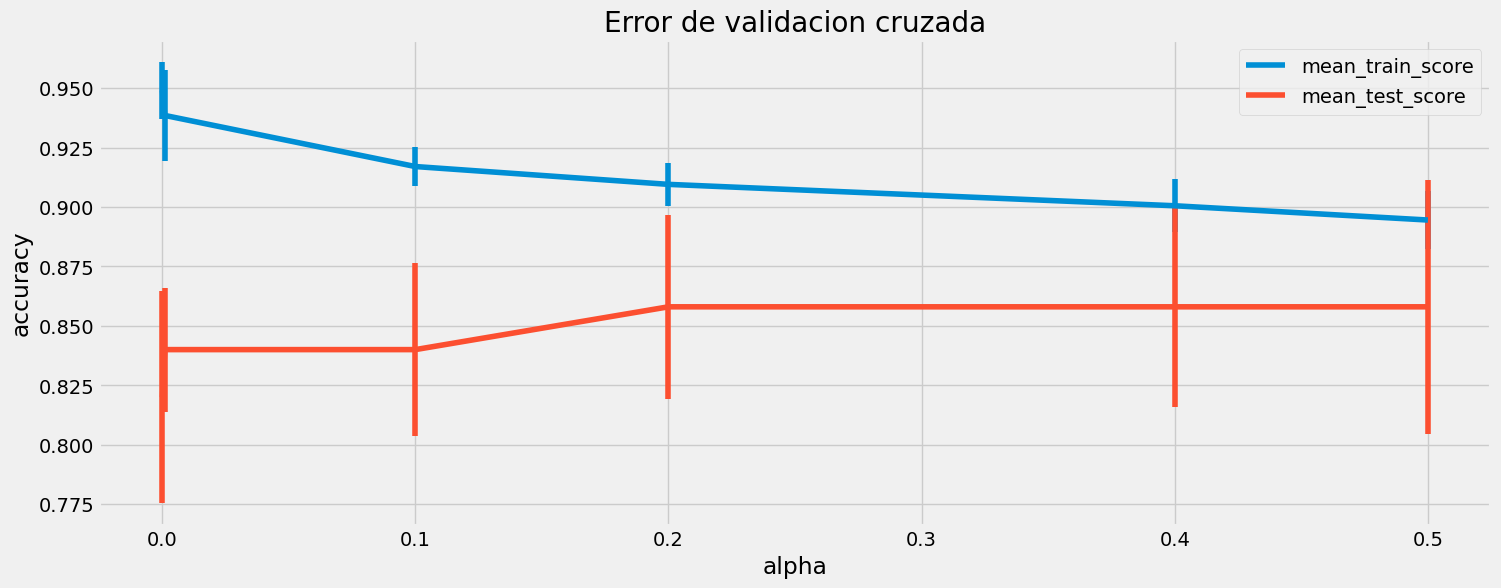

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('alpha')
ax.set_title('Error de validacion cruzada');# learning rate

# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")

### Busquemos las capas ocultas

In [ ]:
# Número de neuronas
# ==============================================================================
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'hidden_layer_sizes': 5} : 0.8640000000000001 (accuracy)


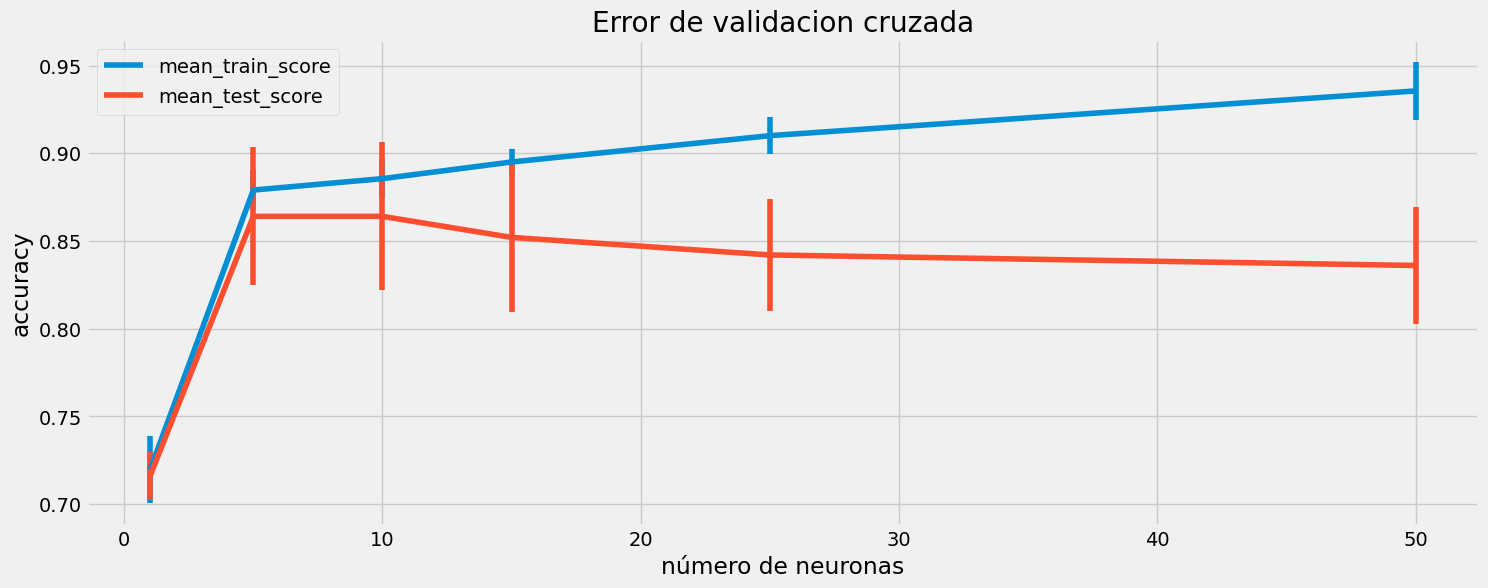

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');# learning rate

# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")



### Busquemos el learning rate





In [ ]:
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(10),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'learning_rate_init': 0.001} : 0.876 (accuracy)


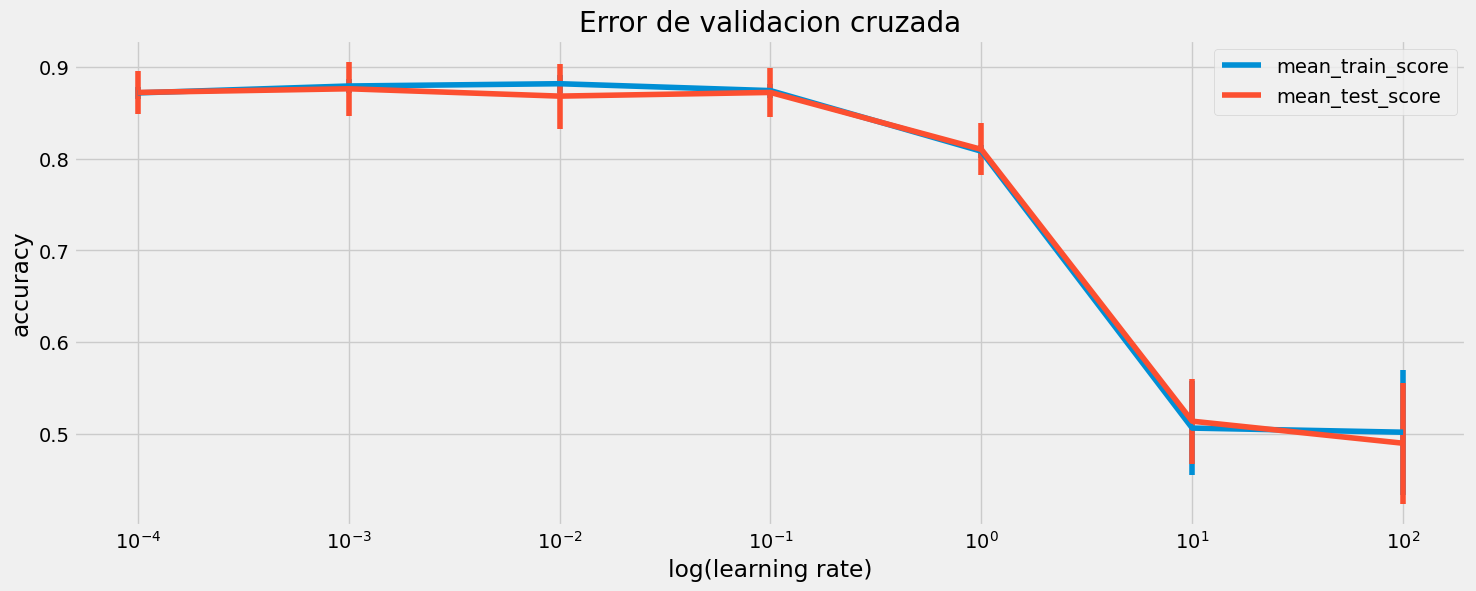

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');

# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")


Si bien los tres ejemplos anteriores sirven para tener una idea intuitiva de cómo afecta cada hiperparámetro, no es posible optimizarlos de forma individual, ya que el impacto final que tiene cada uno depende de qué valor tomen los demás. La búsqueda de hiperparámetros debe hacerse en conjunto.


Dado el elevado número de hiperparámetros que tiene los modelos de redes neuronales, la combinación de posibles configuraciones es muy elevada. Esto hace que la búsqueda de hiperparámetros por grid search cartesiano (todas las combinaciones) sea poco práctica. En su lugar, suele emplearse random grid search, que hace una búsqueda de combinaciones aleatorias. Para más información sobre esta y otras estrategias de búsqueda consultar

## **Random grid search**


`GridSearchCV()` hace una búsqueda exhaustiva evaluando todas las combinaciones de parámetros. Esta estrategia tiene el inconveniente de que se puede invertir mucho tiempo en regiones de poco interés antes de evaluar otras combinaciones. Una alternativa es hacer una búsqueda aleatoria, de esta forma, se consigue explorar el espacio de búsqueda de una forma más distribuida. `RandomizedSearchCV()` permite este tipo de estrategia, únicamente requiere que se le indique el espacio de búsqueda de cada hiperparámetro (lista de opciones o una distribución) y el número de combinaciones aleatorias a evaluar.

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha':[0.2,0.1,0.001,0.0001],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'solver':['adam','lbfgs'],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier( max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_solver,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
36,adam,0.001,10,0.2,0.877955,0.039981,0.876988,0.021438
21,adam,0.01,"(10, 10)",0.0001,0.871919,0.041042,0.884969,0.027216
11,adam,0.01,"(10, 10)",0.001,0.871907,0.039625,0.882970,0.024626
1,adam,0.01,"(10, 10)",0.1,0.869911,0.043076,0.882973,0.023494
33,adam,0.1,"(10, 10)",0.2,0.869911,0.043076,0.883977,0.021241
47,adam,0.1,"(10, 10)",0.1,0.867927,0.029749,0.876994,0.006597
5,adam,0.01,"(10, 10)",0.2,0.865919,0.037716,0.882976,0.022572
18,adam,0.01,"(20, 20)",0.001,0.865919,0.037716,0.885976,0.019726
13,adam,0.1,10,0.001,0.865907,0.042547,0.884978,0.021518
20,adam,0.001,"(10, 10)",0.1,0.865895,0.050566,0.879970,0.030713


In [ ]:
resultados.shape

(50, 20)

In [ ]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")


-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': 10, 'alpha': 0.2} : 0.877954933506481 (accuracy)


In [ ]:
grid.best_estimator_

MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.1,
              max_iter=2000, solver='lbfgs')

Una vez entrenado el modelo, al tratarse de solo dos predictores, puede mostrarse gráficamente las regiones de clasificación aprendidas.

In [ ]:
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
predicciones = modelo.predict(X_grid)

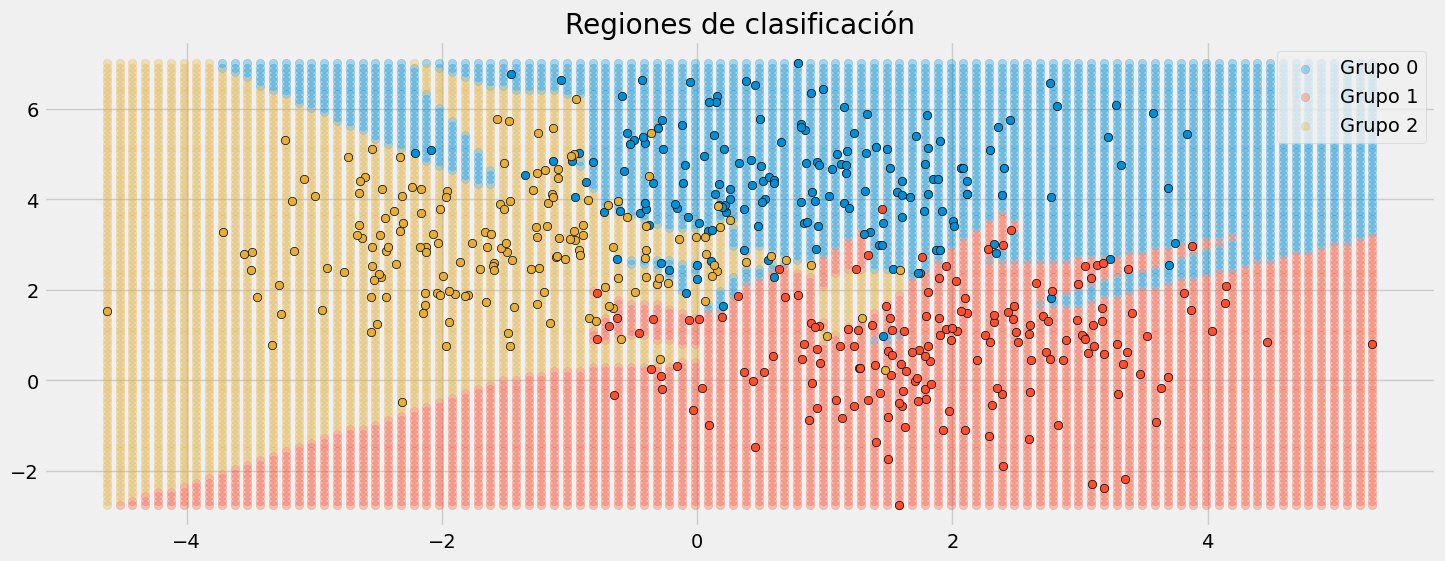

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black'
    )


ax.set_title('Regiones de clasificación')
ax.legend();

# **Ejemplo de Regresión**

El set de datos SaratogaHouses del paquete mosaicData de R contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

* price: precio de la vivienda.
* lotSize: metros cuadrados de la vivienda.
* age: antigüedad de la vivienda.
* landValue: valor del terreno.
* livingArea: metros cuadrados habitables.
* pctCollege: porcentaje del vecindario con título universitario.
* bedrooms: número de dormitorios.
* firplaces: número de chimeneas.
* bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
* rooms: número de habitaciones.
* heating: tipo de calefacción.
* fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
* sewer: tipo de desagüe.
* waterfront: si la vivienda tiene vistas al lago.
* newConstruction: si la vivienda es de nueva construcción.
*centralAir: si la vivienda tiene aire acondicionado.

El objetivo es obtener un modelo capaz de predecir el precio del alquiler.

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/CCDAA/Data/'

url = pathCurso + "SaratogaHouses.csv"

Mounted at /content/drive


In [ ]:
datos = pd.read_csv(url, sep=",")

In [ ]:
datos.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [ ]:

# ==============================================================================

datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios",
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

Todas las columnas tienen el tipo de dato correcto.

In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

Todas las columnas están completas, no hay valores ausentes.

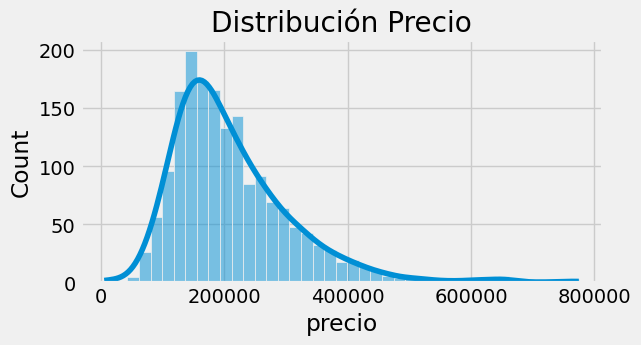

In [ ]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

Los modelos de redes neuronales son de tipo no paramétrico, no asumen ningún tipo de distribución de la variable respuesta, por lo tanto, no es necesario que esta siga ninguna distribución concreta (normal, gamma...). Aun así, siempre es recomendable hacer un estudio mínimo, ya que, a fin de cuentas, es lo que interesa predecir. En este caso, la variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.

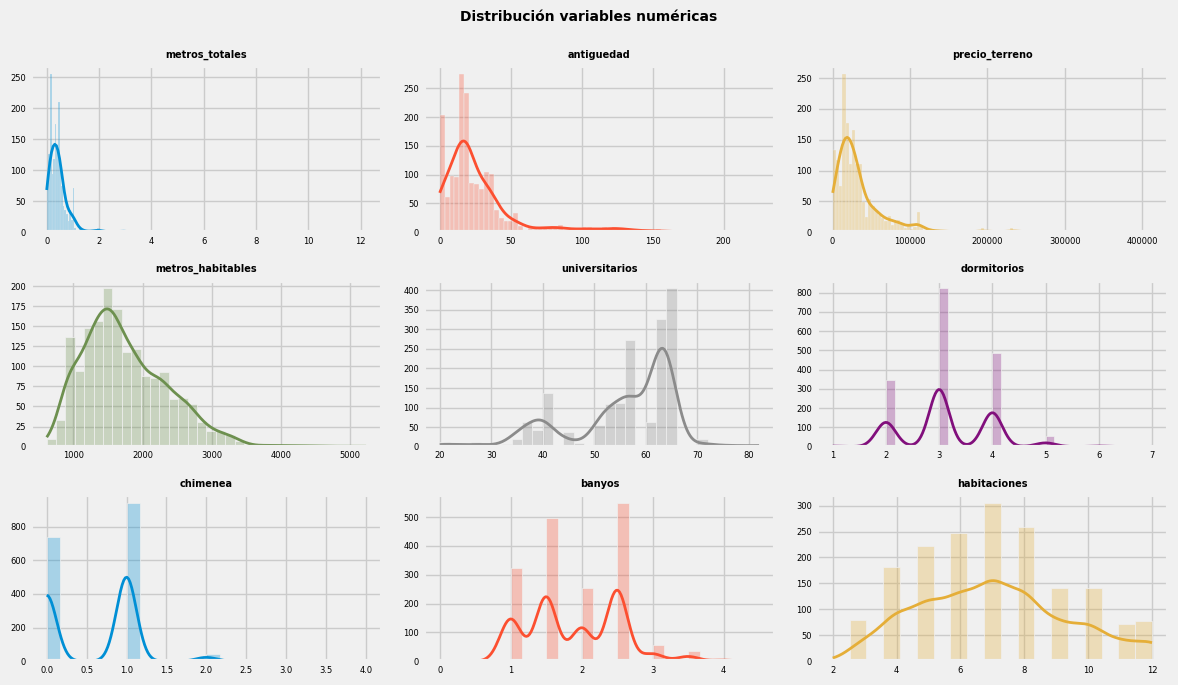

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [ ]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


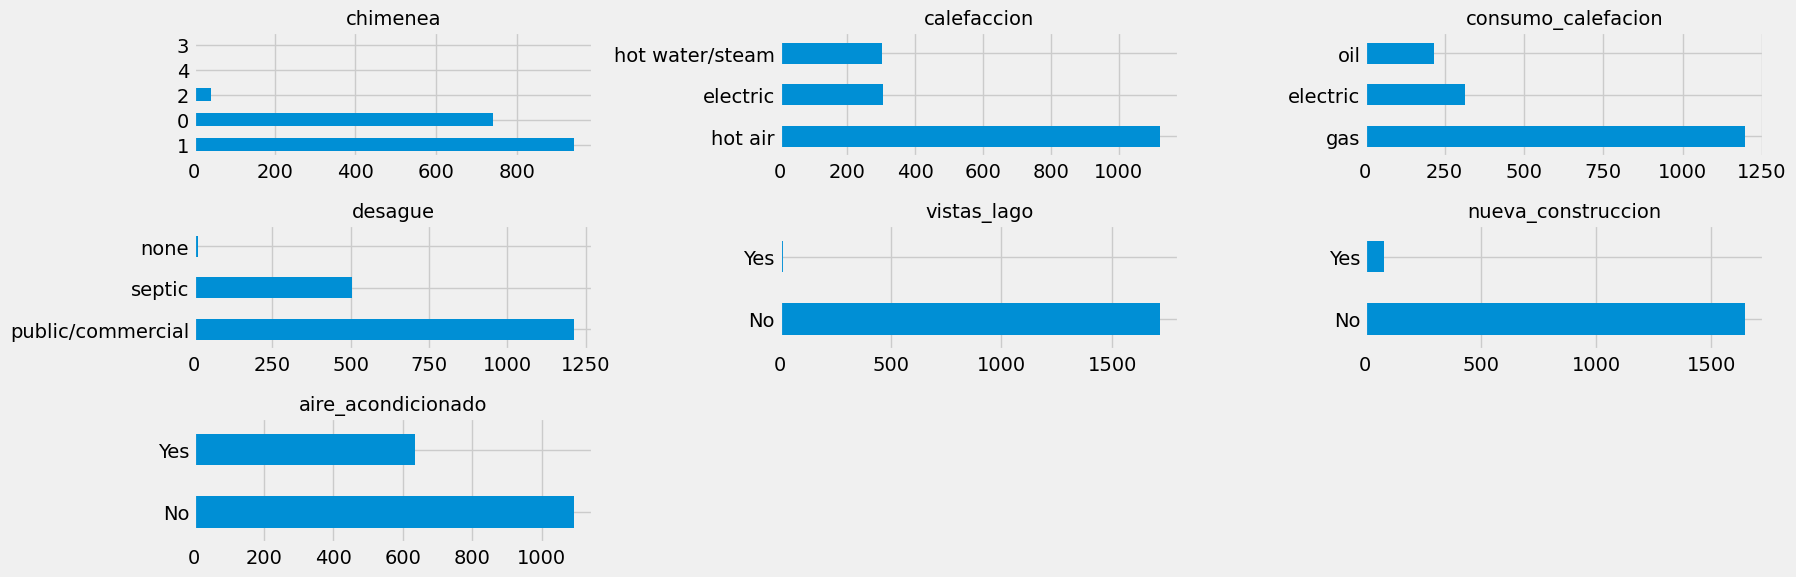

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 6))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. Para este caso, hay que tener precaución con la variable chimenea. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [ ]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])
datos.chimenea.value_counts("%").sort_index()

0        0.428241
1        0.545139
2_mas    0.026620
Name: chimenea, dtype: float64

Con el objetivo de poder estimar el error que comete el modelo al predecir nuevas observaciones, se dividen los datos en dos grupos, uno de entrenamiento y otro de test (80%, 20%).

In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count      1382.000000
mean     211229.997829
std       95803.220875
min        5000.000000
25%      145000.000000
50%      190000.000000
75%      256837.500000
max      775000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.511216,28.374819,34564.377713,1753.793054,55.580318,3.157019,1.904124,7.043415
std,0.729205,29.956544,35340.845071,625.490273,10.279814,0.817498,0.662455,2.318173
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,1.000000,2.000000
25%,0.170000,13.000000,15100.000000,1300.250000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1632.000000,57.000000,3.000000,2.000000,7.000000
75%,0.550000,34.000000,39675.000000,2127.250000,63.000000,4.000000,2.500000,8.000000
max,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1382,1382,1382,1382,1382,1382,1382
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,747,894,943,966,1369,1317,868


 
Partición de test
-----------------------


count       346.000000
mean     214909.277457
std      108439.961494
min       64500.000000
25%      148225.000000
50%      185000.000000
75%      260000.000000
max      775000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.456272,26.083815,34528.468208,1759.699422,55.517341,3.144509,1.884393,7.034682
std,0.559175,25.974490,33763.864231,598.092016,10.560577,0.817870,0.642404,2.312903
min,0.000000,0.000000,300.000000,720.000000,23.000000,1.000000,0.000000,2.000000
25%,0.160000,13.000000,15100.000000,1293.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,18.000000,25000.000000,1654.000000,57.000000,3.000000,2.000000,7.000000
75%,0.520000,33.000000,42850.000000,2207.500000,64.000000,4.000000,2.500000,9.000000
max,6.150000,165.000000,225800.000000,3968.000000,82.000000,6.000000,3.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,346,346,346,346,346,346,346
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,195,227,254,247,344,330,225


Los modelos de redes neuronales requieren como mínimo de dos tipos de preprocesado: binarización (One hot ecoding) de las variables categóricas y estandarización de las variables continuas.

In [ ]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

In [ ]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [ ]:
set_config(display='text')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [ ]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

Si bien realizar el preprocesado de forma separada del entrenamiento es útil para explorar y confirmar que las transformaciones realizadas son las deseadas, en la práctica, es más adecuado asociarlo al propio proceso de entrenamiento. Esto puede hacerse fácilmente en los modelos de scikit-learn con los Pipeline.

In [ ]:
datos_train_prep

In [ ]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [ ]:
np.logspace(-3, 3, 10)

array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])

In [ ]:
# TARDA MÁS DE 7 minutos
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
18,0.001,10,2.154435,-3.239578e+09,5.259204e+08,-2.528993e+09,2.404545e+08
41,0.001,10,10.0,-3.369253e+09,6.210244e+08,-2.469782e+09,2.758168e+08
20,0.001,10,0.021544,-3.416441e+09,5.721427e+08,-2.446492e+09,2.361626e+08
25,0.01,10,0.001,-3.461611e+09,4.999487e+08,-2.335266e+09,1.896370e+08
15,0.001,10,0.001,-3.475785e+09,3.373254e+08,-2.360670e+09,1.106924e+08
4,0.01,10,46.415888,-3.518239e+09,5.230710e+08,-2.364517e+09,1.467292e+08
26,0.001,10,0.004642,-3.529769e+09,3.653385e+08,-2.459036e+09,1.269694e+08
44,0.01,10,0.464159,-3.551150e+09,8.122598e+08,-2.357483e+09,3.008697e+08
30,0.01,10,10.0,-3.553780e+09,7.564484e+08,-2.478900e+09,1.102947e+08
12,0.001,10,1000.0,-3.559165e+09,7.050239e+08,-2.365075e+09,1.080110e+08


La combinación de hiperparámetros con la que se obtienen mejores resultados acorde a las metricas de validación cruzada es:

In [ ]:
modelo_final = grid.best_estimator_
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 2.154434690031882,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
scores = pd.DataFrame(grid.cv_results_)

In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   mean_fit_time                     50 non-null     float64
 1   std_fit_time                      50 non-null     float64
 2   mean_score_time                   50 non-null     float64
 3   std_score_time                    50 non-null     float64
 4   param_modelo__learning_rate_init  50 non-null     object 
 5   param_modelo__hidden_layer_sizes  50 non-null     object 
 6   param_modelo__alpha               50 non-null     object 
 7   params                            50 non-null     object 
 8   split0_test_score                 50 non-null     float64
 9   split1_test_score                 50 non-null     float64
 10  split2_test_score                 50 non-null     float64
 11  split3_test_score                 50 non-null     float64
 12  split4_tes

In [ ]:
# Mejores hiperparámetros
# ==============================================================================
print("-----------------------------------")
print("Mejores hiperparámetros encontrados")
print("-----------------------------------")
print(f"{grid.best_params_} : {grid.best_score_} ({grid.scoring})")


-----------------------------------
Mejores hiperparámetros encontrados
-----------------------------------
{'modelo__learning_rate_init': 0.001, 'modelo__hidden_layer_sizes': 10, 'modelo__alpha': 2.154434690031882} : -3239578276.4368677 (neg_mean_squared_error)


# Funciones Convexas y No Convexas en Aprendizaje Automático

Las funciones convexas y no convexas juegan un papel crucial en la optimización, especialmente relevante para el aprendizaje automático y el entrenamiento de modelos de redes neuronales.

## Funciones Convexas

Una función $(f)$ se considera convexa en un intervalo $( I )$ si, para cualquier par de puntos $( x_1 )$ y $( x_2 )$ en $( I )$ y cualquier $ \lambda$ en el intervalo $[0, 1]$, se cumple la siguiente desigualdad:

$$ f(\lambda x_1 + (1 - \lambda)x_2) \leq \lambda f(x_1) + (1 - \lambda) f(x_2) $$

En términos sencillos, si tomas dos puntos cualesquiera en la curva de una función convexa, el segmento de línea que conecta esos puntos (denominado cuerda) siempre estará por encima de la curva.

### Implicaciones en el Aprendizaje Automático:

- Las funciones convexas tienen un mínimo global. Esto significa que si encontramos un mínimo (por ejemplo, usando el descenso por gradiente), ese mínimo es el óptimo global.
- Es más fácil y confiable optimizar funciones convexas porque no hay riesgo de quedar atrapado en mínimos locales.

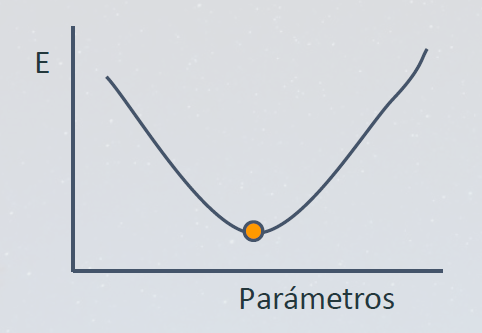

## Funciones No Convexas

Una función que no es convexa en un intervalo se considera no convexa. Estas funciones pueden tener múltiples mínimos locales, es decir, puntos donde la función toma un valor mínimo en un pequeño intervalo, pero no necesariamente en su dominio total.

### Implicaciones en el Aprendizaje Automático:

- Las redes neuronales, especialmente las más profundas, suelen tener funciones de pérdida no convexas.
- Las funciones no convexas tienen múltiples mínimos locales y puntos de silla, lo que puede hacer que los algoritmos de optimización, como el descenso por gradiente, queden atrapados.
- Las técnicas modernas de optimización y entrenamiento, como la inicialización de pesos, el descenso por gradiente estocástico con momentum, o los optimizadores adaptativos como Adam, se han desarrollado para abordar los desafíos de las funciones no convexas.

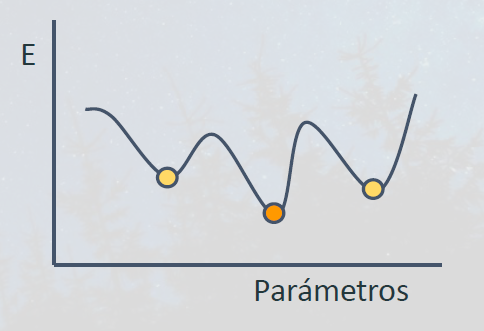


## Relevancia para el Aprendizaje Automático

La distinción entre convexidad y no convexidad es esencial en el aprendizaje automático porque determina la naturaleza y la dificultad de los problemas de optimización que encontramos al entrenar modelos. Para problemas convexos, la optimización es más sencilla y hay garantías de encontrar el mínimo global. Sin embargo, para problemas no convexos, como el entrenamiento de redes neuronales profundas, la optimización puede ser desafiante y requiere técnicas especializadas.



**Funciones no convexas**
* Como elegir valores iniciales de parámetros
* Mínimos locales

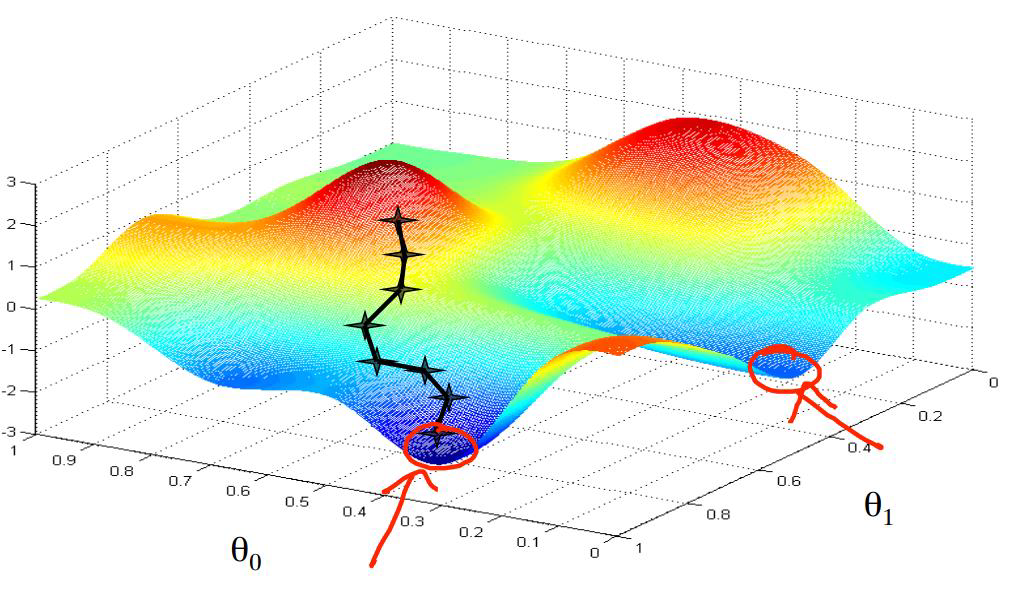

